# 1. Loading and filtering data

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

## 1.1. Firstly we load the data and filter the columns

In [14]:
df = pd.read_csv("/home/alberto/Documentos/MatchingLearning/Practicas/Moriarty2.csv",
                  usecols=["UUID","ActionType"])

df2 = pd.read_csv("/home/alberto/Documentos/MatchingLearning/Practicas/T4.csv",
                 usecols=["UUID", "CPU_0", "CPU_1", "CPU_2", "CPU_3", "Traffic_TotalRxBytes", 
                          "Traffic_TotalTxBytes", "MemFree"])

## 1.2. Merging two datasheets

The first thing we need to do it is to convert column 'UUID' (which is a timestamp in milliseconds) into a date timestamp

In [15]:
df['UUID'] = pd.to_datetime(df['UUID'], unit="ms")
df['UUID'] = df['UUID'].dt.round('t')


df2['UUID'] = pd.to_datetime(df['UUID'], unit="ms")
df2['UUID'] = df['UUID'].dt.round('t')

data = pd.merge(df,df2, on=['UUID'])

## 1.3. Replace ActionType

We need numeric values in the columns, so we replace ActionType malicious/benign by 1/0 respectively. And finally que don't need column 'UUID' for the predincting model so we remove it. 

In [16]:
data['ActionType'] = data['ActionType'].replace(['malicious'], 1)
data['ActionType'] = data['ActionType'].replace(['benign'], 0)
data = data.drop('UUID', 1)
data


,ActionType,CPU_0,CPU_1,CPU_2,CPU_3,Traffic_TotalRxBytes,Traffic_TotalTxBytes,MemFree
0,1,45.833336,52.380955,80.000000,61.904762,0.0,40.0,61348.0
1,1,95.238100,5.000000,100.000000,21.052631,0.0,735.0,60728.0
2,1,72.727270,7.692308,78.947370,4.761905,5901.0,2809.0,69268.0
3,1,5.000000,4.761905,4.761905,4.545454,0.0,0.0,77116.0
4,1,95.238100,5.000000,100.000000,21.052631,0.0,735.0,60728.0
5,1,72.727270,7.692308,78.947370,4.761905,5901.0,2809.0,69268.0
6,1,5.000000,4.761905,4.761905,4.545454,0.0,0.0,77116.0
7,1,95.238100,5.000000,100.000000,21.052631,0.0,735.0,60728.0
8,1,72.727270,7.692308,78.947370,4.761905,5901.0,2809.0,69268.0
9,1,5.000000,4.761905,4.761905,4.545454,0.0,0.0,77116.0


# 2. CROSS VALIDATION ANALYSIS

## 2.1. Features and labels

In [36]:
X = data[['CPU_0', 'CPU_1', 'CPU_2', 'CPU_3', 'Traffic_TotalRxBytes', 'Traffic_TotalTxBytes', 'MemFree']]
y = data['ActionType']

## 2.3. x axis for plotting

In [6]:
import numpy as np
xx = np.stack(i for i in range(len(y)))

##  2.4. Analysis

/home/alberto/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


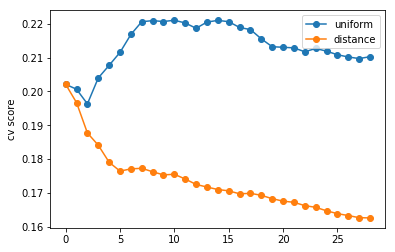

In [7]:
from sklearn import neighbors
from sklearn.cross_validation import cross_val_score

for i, weights in enumerate(['uniform', 'distance']):
    total_scores = []
    for n_neighbors in range(1,30):
        knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
        knn.fit(X,y)
        scores = -cross_val_score(knn, X,y, 
                                    scoring='neg_mean_absolute_error', cv=10)
        total_scores.append(scores.mean())
    
    plt.plot(range(0,len(total_scores)), total_scores, 
             marker='o', label=weights)
    plt.ylabel('cv score')

plt.legend()
plt.show()  

# PCA.

In [8]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
datanorm = scaler.fit_transform(data)

In [9]:
from sklearn.decomposition import PCA

n_components = 2
estimator = PCA(n_components)
X_pca = estimator.fit_transform(datanorm)

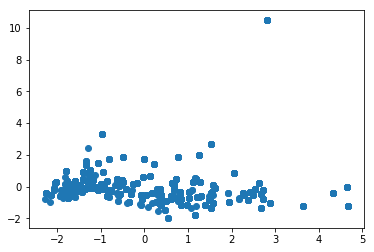

In [10]:
import numpy
import matplotlib.pyplot as plt

x = X_pca[:,0]
y = X_pca[:,1]
plt.scatter(x,y)
plt.show()

# Creating CSV to analyze the results.

In [11]:
import os

directory = "../data/processed"

if not os.path.exists(directory):
    os.makedirs(directory)
    
data.to_csv(directory + "/MoriartyT4.csv")